# Question1

## 1.1

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("houses.csv", delimiter=",")
print df.describe()
print df.info()
dfs = np.array(df)
y = dfs[:,0].reshape([-1,1])
X = dfs[:,1:]
X_1 = dfs[:,3].reshape([-1,1])

       price (grands)      bedrooms     bathrooms   sqft_living      sqft_lot  \
count    21613.000000  21613.000000  21613.000000  21613.000000  2.161300e+04   
mean       540.088142      3.370842      2.114757   2079.899736  1.510697e+04   
std        367.127196      0.930062      0.770163    918.440897  4.142051e+04   
min         75.000000      0.000000      0.000000    290.000000  5.200000e+02   
25%        321.950000      3.000000      1.750000   1427.000000  5.040000e+03   
50%        450.000000      3.000000      2.250000   1910.000000  7.618000e+03   
75%        645.000000      4.000000      2.500000   2550.000000  1.068800e+04   
max       7700.000000     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean       1.494309      0.007542      0.234303      3.409430      7.656873   
std        0.539989      0.086517

## Dataframe:-
Data frame is efficient way to store data in rectangular grids, so that it can be easily visualized. Each row of these grids corresponds to values of an instance, while each column is a vector containing data for a specific variable. 
We can create pandas Dataframe from lists, dictionaries, ndaaray, numpy ndarray, series. Moreover there are various functionalities which becomes very helpful when dealing with humongous amount of data.

describe():-It is used to know various information about all features in data like minimum,maximum,standard deviation, mean etc.
info():-give info about the schema of the data.




## References:

URLhttps://www.datacamp.com/community/tutorials/pandas-tutorial-dataframe-python
Website TitleDataCamp Community
Article TitlePandas Tutorial: DataFrames in Python
Date AccessedFebruary 06, 2018


## 1.2

In [2]:
from __future__ import division
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def normalize_columns(arr):
    rows, cols = arr.shape
    for col in xrange(cols):
        mean_col = arr[:,col].mean()
        std_col = arr[:,col].std()
        arr[:,col] = (arr[:, col] - mean_col) / (std_col)

    return arr


def linear_regression(features, target_value, alpha, iterations):
    err = 0
    param = np.array([random.random() for i in range(np.shape(features)[1]+1)])
    norm_features = np.concatenate((normalize_columns(np.array(features,dtype=float)),np.ones((features.shape[0],1))),axis=1)

    err_list=[]
    for j in range(iterations):
        pred = np.matmul(norm_features, param).reshape([-1, 1])
        err = 0.5 * np.mean((target_value - pred) ** 2)
        gradient_term = np.matmul((target_value - pred).transpose(),norm_features)
        param = param + (alpha * gradient_term).reshape(param.shape)/features.shape[0]
        err_list.append(err)
    print err
    return err_list
    

In [3]:
def predict(err_list1,err_list2,iterations):
    plt.loglog(range(1,iterations+1,1),err_list1,label="X")
    plt.loglog(range(1,iterations+1,1),err_list2,label="X_")
    plt.legend()
    plt.xlabel("No of iterations")
    plt.ylabel("Mean Square Error")
    
    plt.show()

23340.4859342
34175.6434165


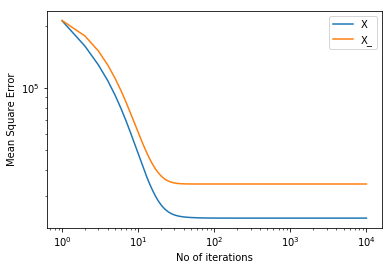

In [4]:
alpha = 0.1
iterations = 10000
errlist1=linear_regression(X, y, alpha, iterations)

errlist2=linear_regression(X_1, y, alpha, iterations)
predict(errlist1,errlist2,iterations)

23340.4859342
34175.6434165


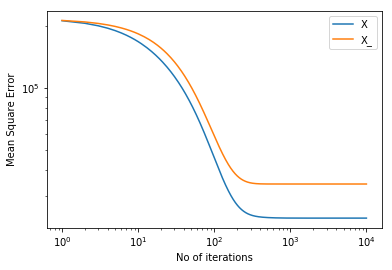

In [5]:
alpha = 10**-2
iterations = 10000
errlist1=linear_regression(X, y, alpha, iterations)

errlist2=linear_regression(X_1, y, alpha, iterations)
predict(errlist1,errlist2,iterations)

23350.1473982
34175.6437817


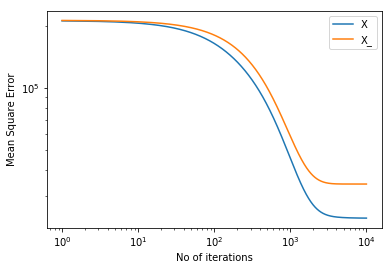

In [6]:
alpha = 10**-3
iterations = 10000
errlist1=linear_regression(X, y, alpha, iterations)

errlist2=linear_regression(X_1, y, alpha, iterations)
predict(errlist1,errlist2,iterations)

## 1.3

In [7]:



def predict2(param,features,target,c):
    predicted_values=np.matmul(param,features.transpose())
    if(c==0):
        plt.plot(target,features[:,0],"*",label="target")
        plt.plot(predicted_values,features[:,0],"*",label="predicted")
        plt.legend()
        plt.xlabel("price")
        plt.ylabel("Area")
        plt.show()
    else:
        plt.plot(predicted_values,target, '*')
        plt.xlabel("predicted price")
        plt.ylabel("Actual Price")
        plt.show()
        
    
def linear_regression(features, target_value, alpha, iterations,c):
    err = 0
    param = np.array([random.random() for i in range(np.shape(features)[1]+1)])
    norm_features = np.concatenate((normalize_columns(np.array(features,dtype=float)),np.ones((features.shape[0],1))),axis=1)
   
    err_list=[]
    for j in range(iterations):
        err = 0.5 * np.mean((target_value - np.matmul(norm_features, param).reshape([-1, 1])) ** 2)
        gradient_term = np.matmul((target_value - np.matmul(norm_features, param).reshape([-1, 1])).transpose(),norm_features)
        param = param + (alpha * gradient_term).reshape(param.shape)/features.shape[0]

        err_list.append(err)
    predict2(param,norm_features,target_value,c)
   

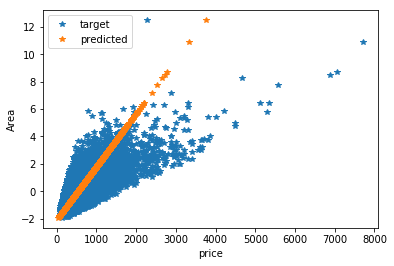

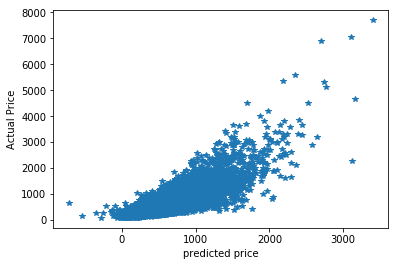

In [8]:
alpha = 10**-3
iterations = 10000
linear_regression(X_1, y, alpha, iterations,0)
linear_regression(X, y, alpha, iterations,1)



## 1.4

In [9]:


def linear_ridge_regression(features, target_value, alpha, iterations):
    err = 0
    param = np.array([random.random() for i in range(np.shape(features)[1]+1)])
    norm_features = np.concatenate((normalize_columns(np.array(features,dtype=float)),np.ones((features.shape[0],1))),axis=1)
   
    err_list=[]
    for j in range(iterations):
        err = 0.5 * np.mean((target_value - np.matmul(norm_features, param).reshape([-1, 1])) ** 2)+0.05*np.sum(param[1:]**2)
        gradient_term = np.matmul((target_value - np.matmul(norm_features, param).reshape([-1, 1])).transpose(),norm_features)+0.05*np.sum(np.sum(param)*param)
        param = param + (alpha * gradient_term).reshape(param.shape)/features.shape[0]
        err_list.append(err)
    print err
    return err_list


In [10]:
def predict(err_list1,err_list2,iterations):
    plt.loglog(range(1,iterations+1,1),err_list1,label="X")
    plt.loglog(range(1,iterations+1,1),err_list2,label="X_")
    plt.legend()
    plt.xlabel("No of iterations")
    plt.ylabel("Mean Square Error")
    
    plt.show()

52442.6000476
64133.7129879


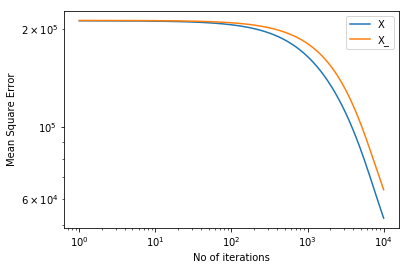

In [11]:
alpha = 10**-4
iterations = 10000
errlist1=linear_ridge_regression(X, y, alpha, iterations)

errlist2=linear_ridge_regression(X_1, y, alpha, iterations)
predict(errlist1,errlist2,iterations)

40524.2402356
48841.3820367


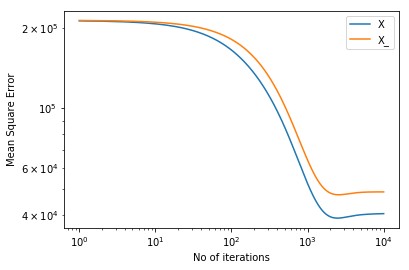

In [12]:
alpha = 10**-3
iterations = 10000
errlist1=linear_ridge_regression(X, y, alpha, iterations)

errlist2=linear_ridge_regression(X_1, y, alpha, iterations)
predict(errlist1,errlist2,iterations)

40932.1550938
48842.8362741


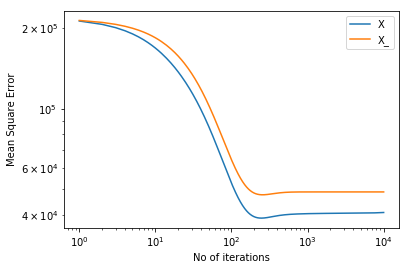

In [13]:
alpha = 10**-2
iterations = 10000
errlist1=linear_ridge_regression(X, y, alpha, iterations)

errlist2=linear_ridge_regression(X_1, y, alpha, iterations)
predict(errlist1,errlist2,iterations)

In [14]:


def linear_regression(features, target_value, alpha, iterations,c):
    err = 0
    param = np.array([random.random() for i in range(np.shape(features)[1]+1)])
    norm_features = np.concatenate((normalize_columns(np.array(features,dtype=float)),np.ones((features.shape[0],1))),axis=1)
   
    for j in range(iterations):
        err = 0.5 * np.mean((target_value - np.matmul(norm_features, param).reshape([-1, 1])) ** 2)
        gradient_term = np.matmul((target_value - np.matmul(norm_features, param).reshape([-1, 1])).transpose(),norm_features)
        param = param + (alpha * gradient_term).reshape(param.shape)/features.shape[0]

    predict2(param,norm_features,target_value,c)

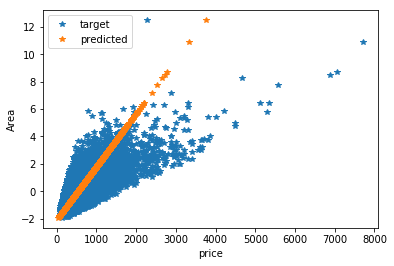

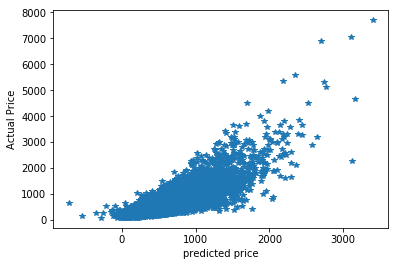

In [15]:
alpha = 10**-3
iterations = 10000
linear_regression(X_1, y, alpha, iterations,0)
linear_regression(X, y, alpha, iterations,1)

## 1.5

In [16]:

def linear_regression_momentum(features, target_value, alpha, iterations):
    err = 0
    param = np.array([random.random() for i in range(np.shape(features)[1] + 1)])
    norm_features = np.concatenate(
        (normalize_columns(np.array(features, dtype=float)), np.ones((features.shape[0], 1))), axis=1)
    gradient_term = np.zeros((1, norm_features.shape[1]))
    err_list=[]
    for j in range(iterations):
        err = 0.5 * np.mean((target_value - np.matmul(norm_features, param).reshape([-1, 1])) ** 2)
        gradient_term = 0.9 * gradient_term + alpha * np.matmul(
            (target_value - np.matmul(norm_features, param).reshape([-1, 1])).transpose(), norm_features)/features.shape[0]

        param = param + gradient_term.reshape(param.shape)
        err_list.append(err)
    print err
    return err_list
   




In [17]:
def predict3(err_list1,err_list2,iterations):
    plt.loglog(range(1,iterations+1,1),err_list1,label="with_momentum")
    plt.loglog(range(1,iterations+1,1),err_list2,label="without_momentum_")
    plt.legend()
    plt.xlabel("No of iterations")
    plt.ylabel("Mean Square Error")
    
    plt.show()

23340.4859342
48842.8362741


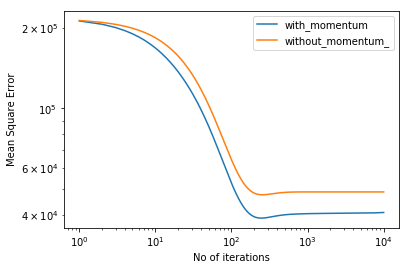

In [18]:
alpha = 10 ** -2
iterations = 10000
err_list1=linear_regression_momentum(X, y, alpha, iterations)
errlist2=linear_ridge_regression(X_1, y, alpha, iterations)
predict3(errlist1,errlist2,iterations)

## 1.6

In [19]:
def polnomial_regression_optimized(features, target_value, alpha, iterations):
    err = 0
    param = np.array([random.random() for i in range(np.shape(features)[1] + 2)])
    norm_features = np.concatenate((
                                    normalize_columns(np.array(features ** 2, dtype=float)),
                                    normalize_columns(np.array(features, dtype=float)),
                                    np.ones((features.shape[0], 1))),
                                   axis=1)
    gradient_term = np.zeros((1, norm_features.shape[1]))
    err_list=[]
    for j in range(iterations):
        err = 0.5 * np.mean((target_value - np.matmul(norm_features, param).reshape([-1, 1])) ** 2)
        gradient_term = 0.9 * gradient_term + alpha * np.matmul(
            (target_value - np.matmul(norm_features, param).reshape([-1, 1])).transpose(), norm_features)/features.shape[0]

        param = param + gradient_term.reshape(param.shape)
        err_list.append(err)
    print err
    return err_list


31487.5416055


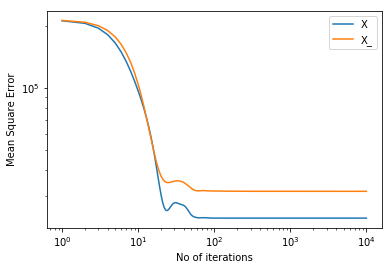

In [20]:
alpha = 10 ** -2
iterations = 10000
err_list2=polnomial_regression_optimized(X_1, y, alpha, iterations)
predict(err_list1,err_list2,iterations)

In [21]:
def polnomial_regression_optimized(features, target_value, alpha, iterations,c):
    err = 0
    param = np.array([random.random() for i in range(np.shape(features)[1] + 2)])
    norm_features = np.concatenate((
                                    normalize_columns(np.array(features ** 2, dtype=float)),
                                    normalize_columns(np.array(features, dtype=float)),
                                    np.ones((features.shape[0], 1))),
                                   axis=1)
    gradient_term = np.zeros((1, norm_features.shape[1]))
    
    for j in range(iterations):
        err = 0.5 * np.mean((target_value - np.matmul(norm_features, param).reshape([-1, 1])) ** 2)
        gradient_term = 0.9 * gradient_term + alpha * np.matmul(
            (target_value - np.matmul(norm_features, param).reshape([-1, 1])).transpose(), norm_features)/features.shape[0]

        param = param + gradient_term.reshape(param.shape)
    print err
    predict2(param,norm_features,target_value,c)

31582.2463309


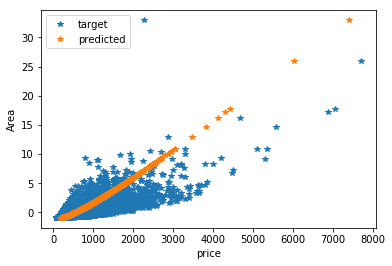

In [22]:
alpha = 10**-4
iterations = 10000
polnomial_regression_optimized(X_1, y, alpha, iterations,0)


# Question2

## 2.1

probablity of number  2  is equal to  0.1
probablity of number  4  is equal to  0.05
probablity of number  5  is equal to  0.05
probablity of number  6  is equal to  0.2
probablity of number  7  is equal to  0.1
probablity of number  8  is equal to  0.15
probablity of number  9  is equal to  0.15
probablity of number  10  is equal to  0.1
probablity of number  11  is equal to  0.1


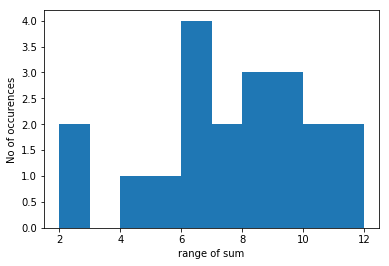

In [13]:
import random
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
list_of_randomsum=[]
for i in range(20):
    a=random.randint(1,6)
    b=random.randint(1,6)
    list_of_randomsum.append(a + b)

counter=Counter(list_of_randomsum)
for i in range(len(counter.keys())):
    print "probablity of number ",counter.keys()[i]," is equal to ",counter.values()[i]*1.0/20

plt.hist(np.array(list_of_randomsum), normed=False, bins=range(2, 13))
plt.ylabel('No of occurences')
plt.xlabel("range of sum")
plt.show()

## 2,2

probablity of number  2  is equal to  0.023
probablity of number  3  is equal to  0.042
probablity of number  4  is equal to  0.078
probablity of number  5  is equal to  0.124
probablity of number  6  is equal to  0.139
probablity of number  7  is equal to  0.145
probablity of number  8  is equal to  0.161
probablity of number  9  is equal to  0.111
probablity of number  10  is equal to  0.09
probablity of number  11  is equal to  0.059
probablity of number  12  is equal to  0.028


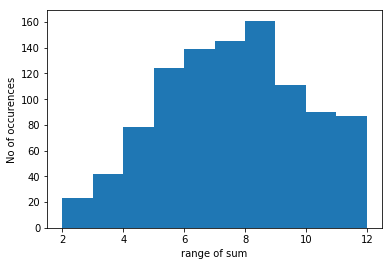

In [9]:
import random
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
list_of_randomsum=[]
for i in range(1000):
    a=random.randint(1,6)
    b=random.randint(1,6)
    list_of_randomsum.append(a + b)

counter=Counter(list_of_randomsum)
for i in range(len(counter.keys())):
    print "probablity of number ",counter.keys()[i]," is equal to ",counter.values()[i]*1.0/1000
plt.hist(np.array(list_of_randomsum), normed=False, bins=range(2, 13))
plt.ylabel('No of occurences')
plt.xlabel("range of sum")
plt.show()

## 2,3

In [16]:
def probablity_of_num(n):
    count=0
    list_of_num=[1,0,3,4,5,6]
    for i in range(1,7):
        for k in list_of_num:
            if(i+k==n):
                count=count+1
                list_of_num.remove(k)
                break

    print "probablity of getting ",n," is ",count*1.0/36
probablity_of_num(3)
probablity_of_num(7)

probablity of getting  3  is  0.0555555555556
probablity of getting  7  is  0.138888888889


## 2.4

mean is  24.479 variance is  20.201559
mean is  0.0277831557058 variance is  0.000972392894511


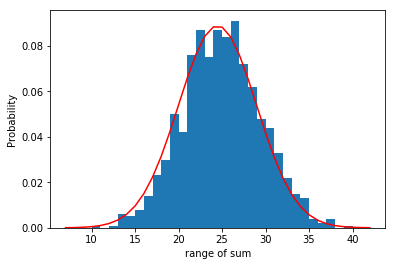

In [14]:
import random
import numpy as np
import matplotlib.pyplot as plt

list_of_randomsum=[]
for i in range(1000):
    x = 0
    for i in range(7):
        x=x+random.randint(1,6)
    list_of_randomsum.append(x)

list_of_gaussfunction=[]
for i in range(7,43,1):
    y= np.exp(-(i - np.array(list_of_randomsum).mean()) ** 2 / (2 * np.array(list_of_randomsum).std() ** 2)) / (np.array(list_of_randomsum).std() * (2 * 3.14) ** 0.5)
    list_of_gaussfunction.append(y)

list_of_possiblesum=[i for i in range(7, 43, 1)]

print "mean is ",np.array(list_of_randomsum).mean(), "variance is ", np.array(list_of_randomsum).std() ** 2

plt.hist(np.array(list_of_randomsum), normed=True, bins=range(7, 6 * 7 + 1))
plt.plot(list_of_possiblesum, list_of_gaussfunction, "r")
plt.ylabel('Probability');
plt.xlabel('range of sum')
plt.show()


## 3

## I have attached PDF for 3rd question. I did integral using the website mentioned below for the given question.

URLhttps://www.integral-calculator.com/
Website TitleIntegral Calculator • With Steps!
Article TitleIntegral Calculator
Date AccessedFebruary 06, 2018